# prediction king county
[https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format='png'
%matplotlib inline

df_train=pd.read_csv("./input/kc_train.csv", header=None)
df_train.columns=['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','distance']

df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,distance
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,13558.890160
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,17286.596180
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,17119.313980
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,6919.062119
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,20544.169770


In [2]:
df_train['price'].describe()

count    1.000000e+04
mean     5.428749e+05
std      3.729258e+05
min      7.500000e+04
25%      3.225000e+05
50%      4.507000e+05
75%      6.450000e+05
max      6.885000e+06
Name: price, dtype: float64

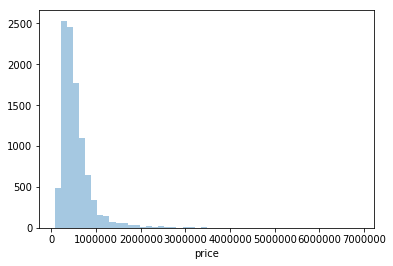

In [3]:
sns.distplot(df_train['price'], bins=50, kde=False)

In [4]:
print("Skewness : %f " % df_train['price'].skew())
print("Kurtosis: %f " % df_train['price'].kurt())

Skewness : 3.898737 
Kurtosis: 29.356202 


### 2. Feature exploration

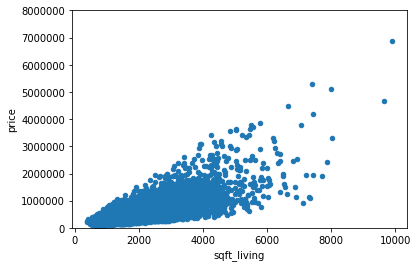

In [7]:
var='sqft_living'
data=pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000))

(-0.5, 10.5, 0, 3500000)

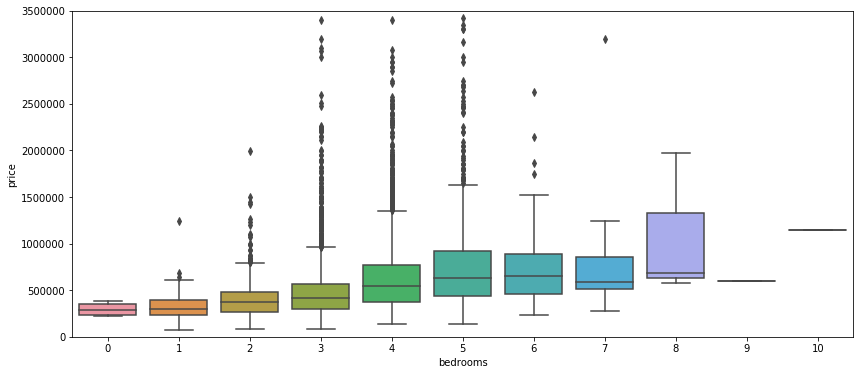

In [10]:
var="bedrooms"
data=pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14,6))
fig=sns.boxplot(x=var, y="price",data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 10.5, 0, 3500000)

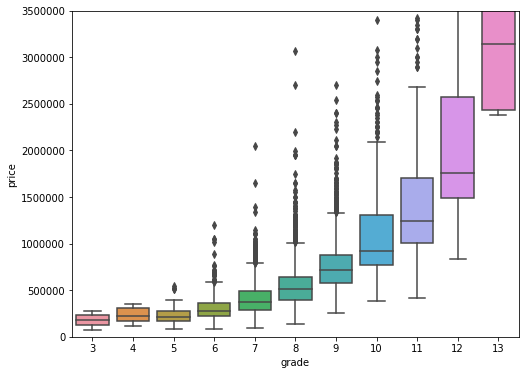

In [11]:
var="grade"
data=pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y="price",data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 26.5, 0, 3500000)

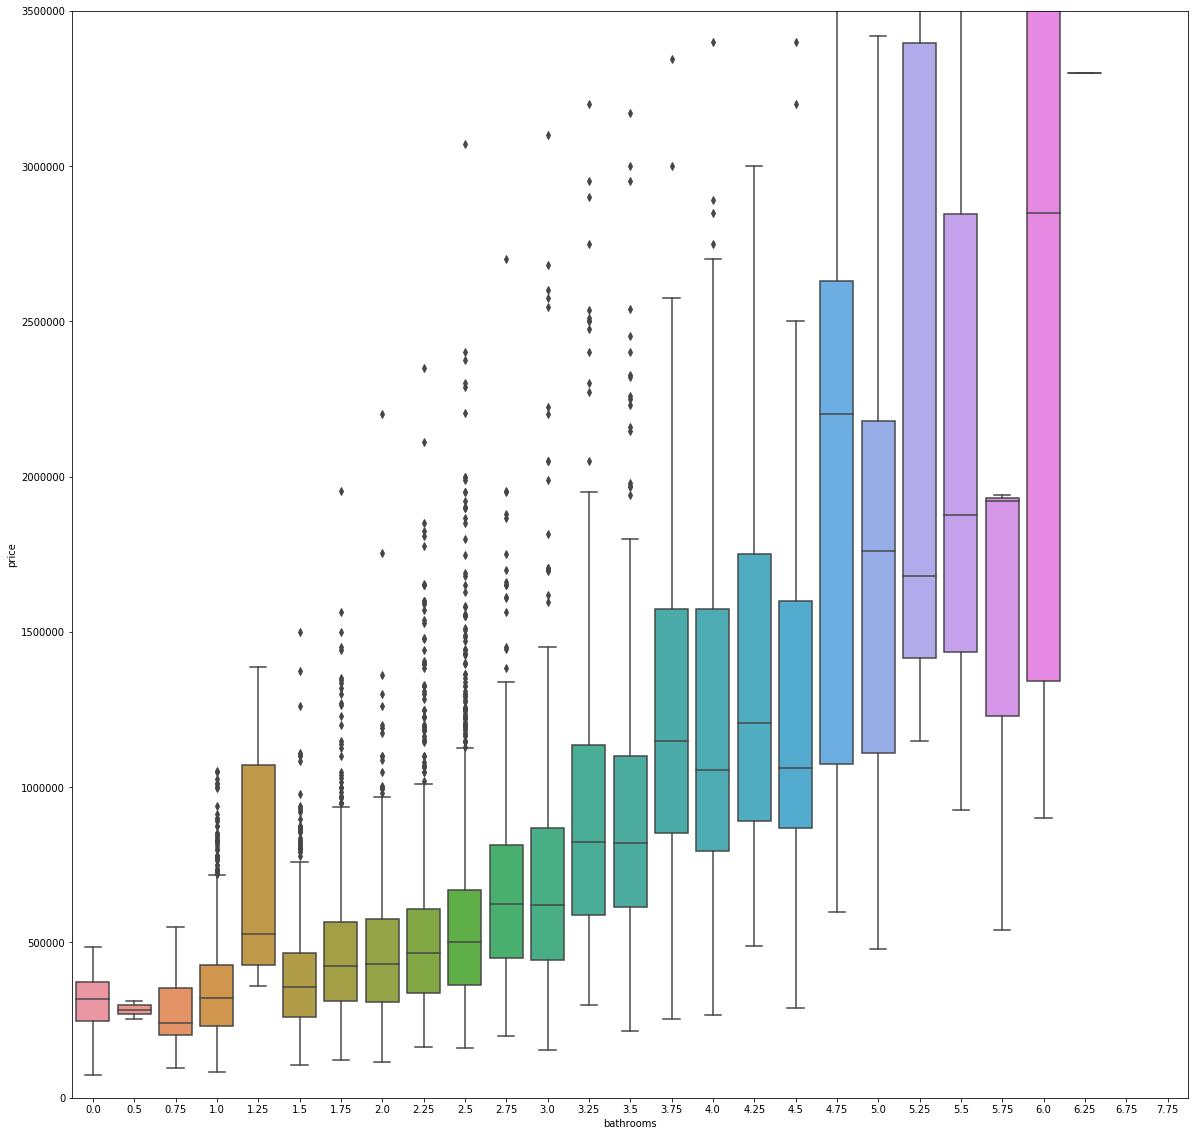

In [13]:
var="bathrooms"
data=pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(20,20))
fig=sns.boxplot(x=var, y="price",data=data)
fig.axis(ymin=0, ymax=3500000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

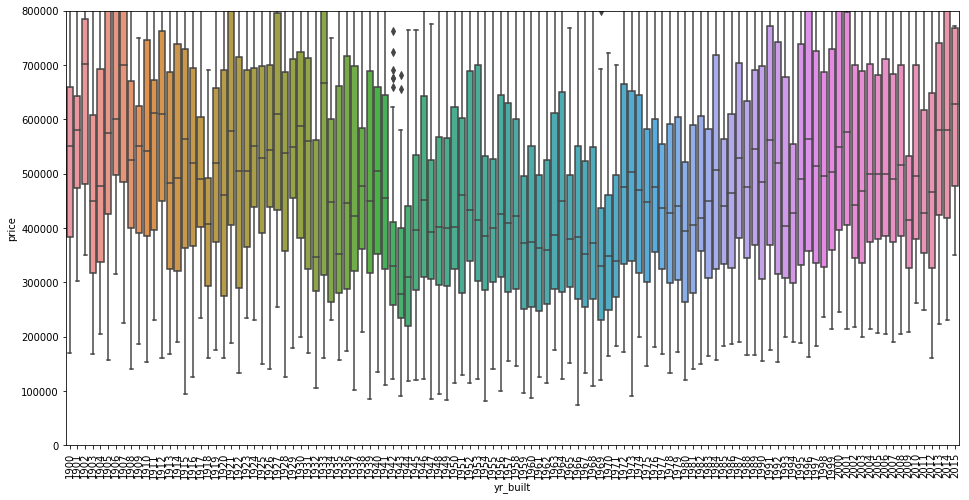

In [16]:
var="yr_built"
data=pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y="price",data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(-0.5, 9813.5, 0, 3500000)

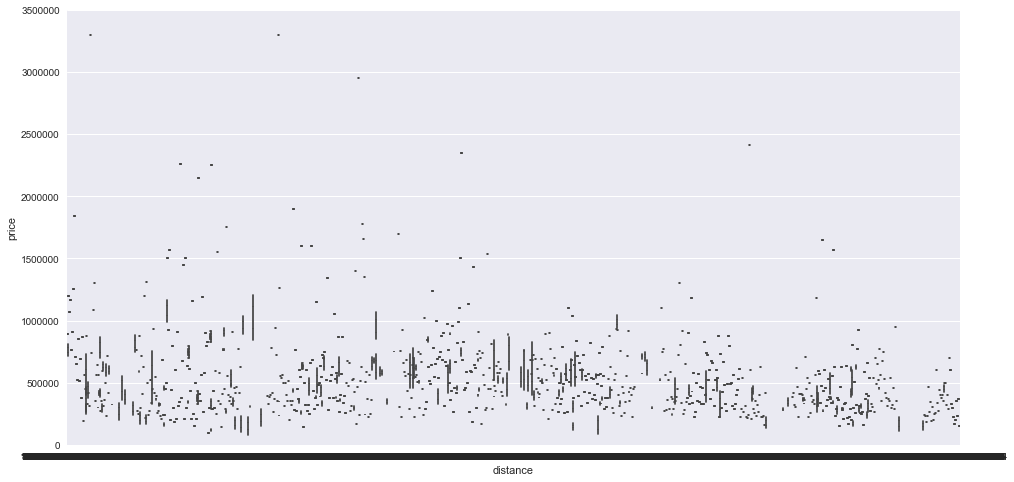

In [28]:
var="distance"
data=pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y="price",data=data)
fig.axis(ymin=0, ymax=3500000)


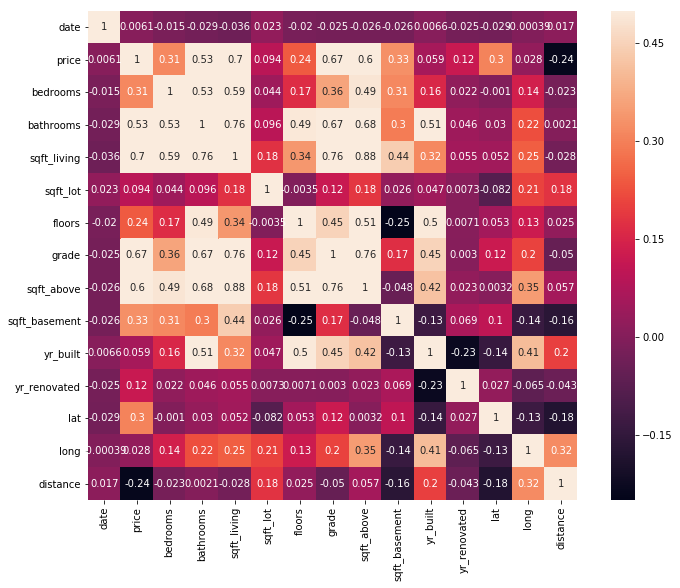

In [21]:
corrmat=df_train.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.5, square=True, annot=True)

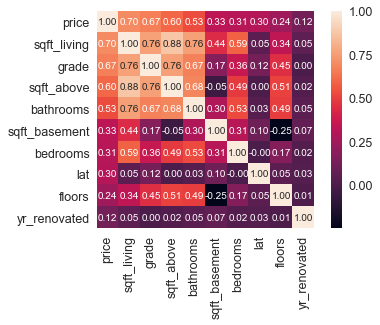

In [23]:
k=10
cols=corrmat.nlargest(k, 'price')['price'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
               annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

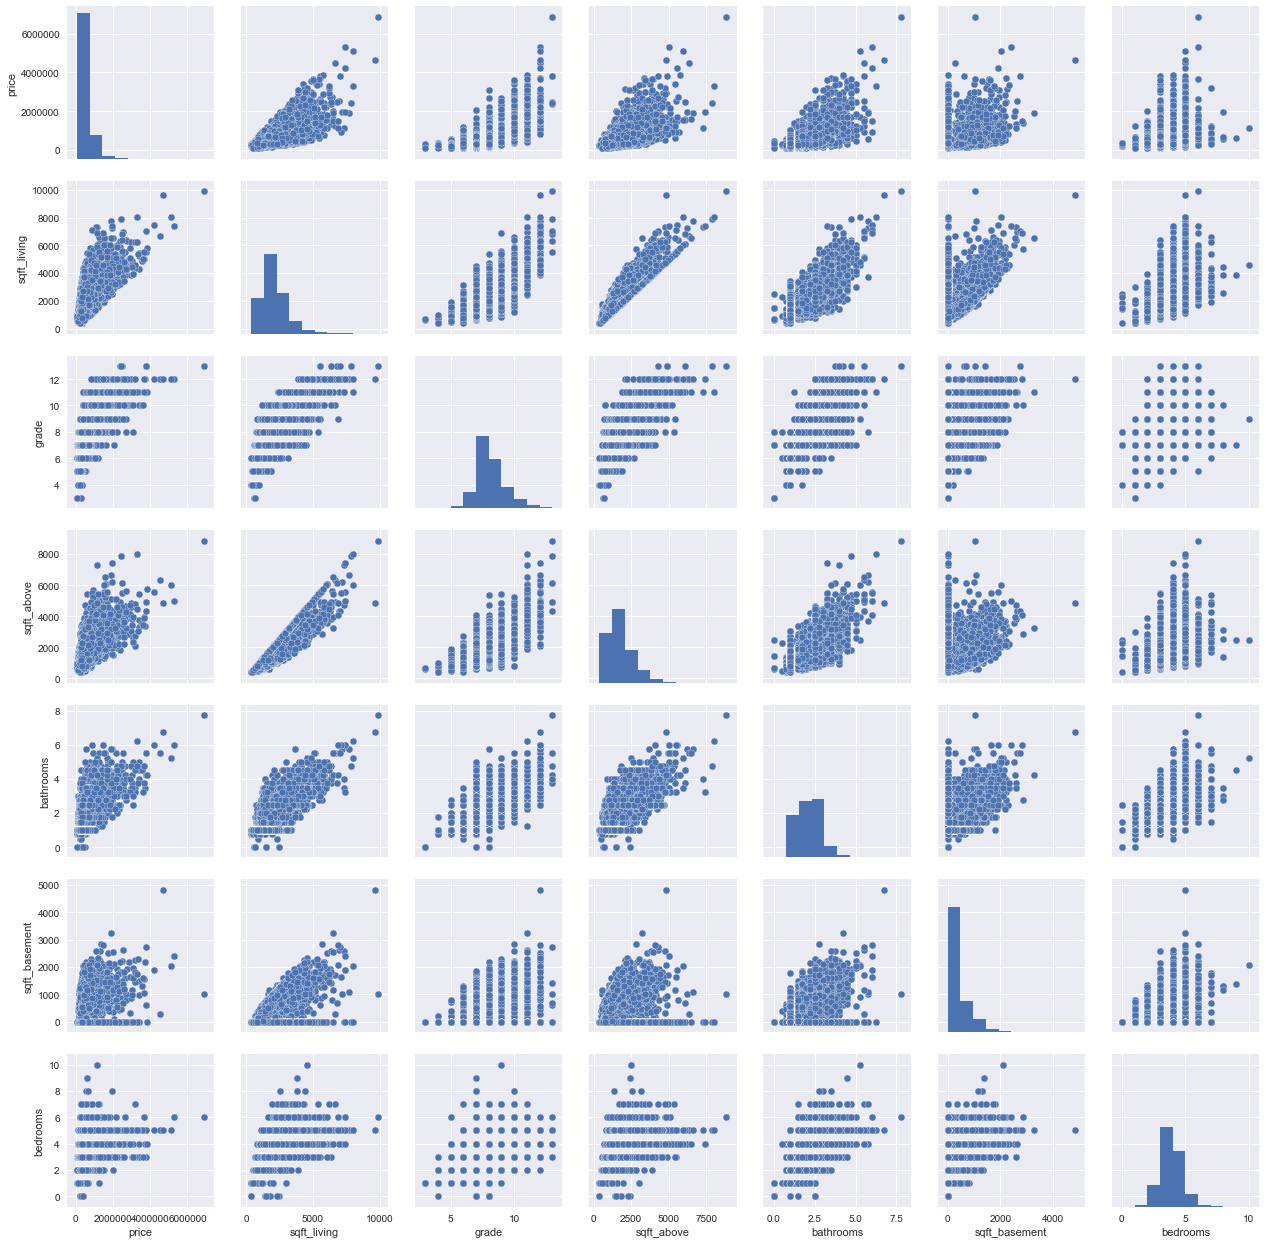

In [25]:
sns.set()
cols=['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'sqft_basement', 'bedrooms']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [26]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
distance,0,0.0
long,0,0.0
lat,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0
grade,0,0.0
floors,0,0.0
sqft_lot,0,0.0


# Standardiztion of data

In [29]:
from sklearn.preprocessing import StandardScaler
salesprice_scaled=StandardScaler().fit_transform(df_train['price'][:, np.newaxis])
low_range=salesprice_scaled[salesprice_scaled[:, 0].argsort()][:10]
high_range=salesprice_scaled[salesprice_scaled[:, 0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.2546688 ]
 [-1.23589737]
 [-1.23053411]
 [-1.22785247]
 [-1.22785247]
 [-1.22383002]
 [-1.21444431]
 [-1.21444431]
 [-1.20908104]
 [-1.20103615]]

outer range (high) of the distribution:
[[ 8.4930668 ]
 [ 8.73441376]
 [ 8.73441376]
 [ 8.8684954 ]
 [ 9.82851998]
 [10.61155679]
 [11.06207112]
 [12.24949816]
 [12.75686311]
 [17.00725126]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


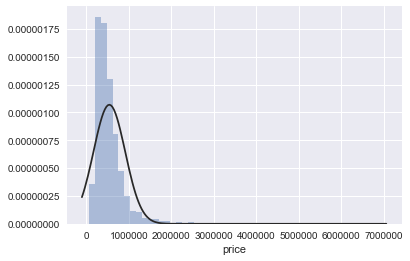

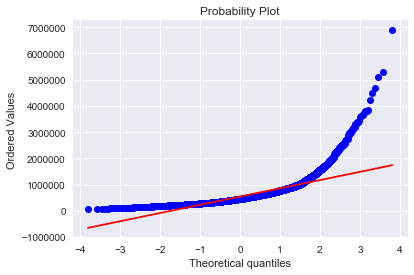

In [30]:
from scipy.stats import norm
from scipy import stats

sns.distplot(df_train['price'], fit=norm, bins=50, kde=False)
fig=plt.figure()
res=stats.probplot(df_train['price'], plot=plt)

In [31]:
df_train['price']=np.log(df_train['price'])

In [32]:
sns.distplot(df_train['price' fit=norm, bins=50, kde=False])

fig=plt.figure()
res=stats.probplot(df_train['price'], plot=plt)

SyntaxError: invalid syntax (<ipython-input-32-fe32b3b8b9cf>, line 1)

In [ ]:
sns.distplot(df_train['sqft_living'], fit=norm, bins=50, kde=False)
fig=plt.figure()
res=stats.probplot(df_train['price'], plot=plt)

In [ ]:
df_train['sqft_living']=np.log(df_train['sqft_living'])

In [ ]:
sns.distplot(df_train['sqft_living'], fit=norm, bins=50, kde=False)
fig=plt.figure()
res=stats.probplot(df_train['price'], plot=plt)

In [ ]:
plt.scatter(df_train['sqft_living'], df_train['price'])

In [ ]:
df_train.head()

In [ ]:
y=df_train.price.values

In [ ]:
feature_cols=['']

In [ ]:
df_train.columns